In [ ]:
 !pip install langgraph -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 16.1 MB/s eta 0:00:00


# Simple Graph

In [ ]:
from typing import TypedDict

In [ ]:
from os import name
class AgentState(TypedDict):
  name: str
  age: int
  message: str

In [ ]:
def hello(state : AgentState) -> AgentState:
  state['message'] = f"Hello {state['name']}! Your age is {state['age']}"
  return state

In [ ]:
from langgraph.graph import StateGraph, START, END

In [ ]:
workflow = StateGraph(AgentState)

workflow.add_node("hello",hello)

workflow.add_edge(START, "hello")
workflow.add_edge("hello", END)

app = workflow.compile()

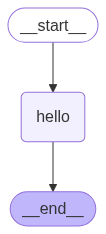

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"name":"Visal", "age":25})
print(result['message'])

Hello Visal! Your age is 25


# Sequential Graph

In [ ]:
from os import name
class AgentState(TypedDict):
  name: str
  age: int
  message: str

In [ ]:
def hello_name(state : AgentState) -> AgentState:
  state['message'] = f"Hello {state['name']}"
  return state

def hello_age(state : AgentState) -> AgentState:
  state['message'] = f"Hello {state['message']}! Your age is {state['age']}"
  return state

In [ ]:
workflow = StateGraph(AgentState)

workflow.add_node("hello_name",hello_name)
workflow.add_node("hello_age",hello_age)

workflow.add_edge(START, "hello_name")
workflow.add_edge("hello_name", "hello_age")
workflow.add_edge("hello_age", END)

app = workflow.compile()

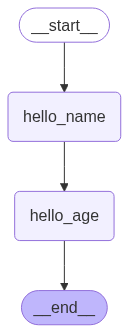

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"name":"Visal", "age":25})
print(result['message'])

Hello Hello Visal! Your age is 25


# Conditional Graph

In [ ]:
from os import name
class AgentState(TypedDict):
  num1 : int
  num2 : int
  operation : str
  result : int

In [ ]:
def addition(state : AgentState) -> AgentState:
  state['result'] = state["num1"] + state["num2"]
  return state

def subtraction(state : AgentState) -> AgentState:
  state['result'] = state["num1"] - state["num2"]
  return state

def multiplication(state : AgentState) -> AgentState:
  state['result'] = state["num1"] * state["num2"]
  return state

def division(state : AgentState) -> AgentState:
  state['result'] = state["num1"] / state["num2"]
  return state

def invalid(state : AgentState) -> AgentState:
  state['result'] = f"Invalid Operation, Please Enter the Valid Operation"
  return state

def decision_node(state : AgentState) -> AgentState:
  if state["operation"] == "+":
    return "addition_operation"
  elif state["operation"] == "-":
    return "subtraction_operation"
  elif state["operation"] == "*":
    return "multiplication_operation"
  elif state["operation"] == "/":
    return "division_operation"
  else:
    return "invalid_operation"

In [ ]:
from langgraph.graph import StateGraph, START, END

In [ ]:
workflow = StateGraph(AgentState)

workflow.add_node("addition",addition)
workflow.add_node("subtraction",subtraction)
workflow.add_node("multiplication",multiplication)
workflow.add_node("division",division)
workflow.add_node("invalid",invalid)
workflow.add_node("router",lambda state:state)

workflow.add_edge(START, "router")
workflow.add_conditional_edges(
    "router",
    decision_node,
    {
        "addition_operation": "addition",
        "subtraction_operation": "subtraction",
        "multiplication_operation": "multiplication",
        "division_operation": "division",
        "invalid_operation": "invalid"
    }
)
workflow.add_edge("addition", END)
workflow.add_edge("subtraction", END)
workflow.add_edge("multiplication", END)
workflow.add_edge("division", END)
workflow.add_edge("invalid", END)

app = workflow.compile()

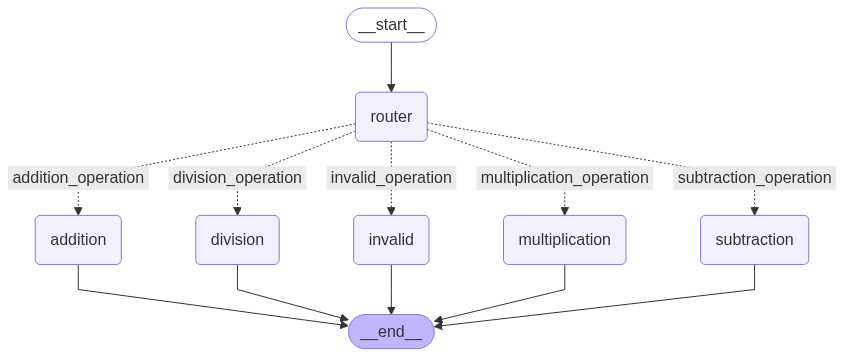

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"num1":34, "num2":30, "operation":"*"})
print(result['result'])

1020
